# Resources (Packages, Data)

In [1]:
# Setup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings

# Filtering future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# I'm partial to the Iris dataset, which is included in seaborn.
iris = sns.load_dataset('iris')

# set style
sns.set_theme(style="darkgrid")


# Questions & Analysis

In [2]:
# pull basic df info
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The "Iris" dataset describes 150 species of flowers in terms of the length and width of their sepals and petals.
I'd like to know what the central tenadency for petal and sepal lengths is (think: flower size), and how they differ according to species. 

Let's assess using three visuals:
1. Petal length distribution
2. Petal length and width by species
3. Sepal lengths by species


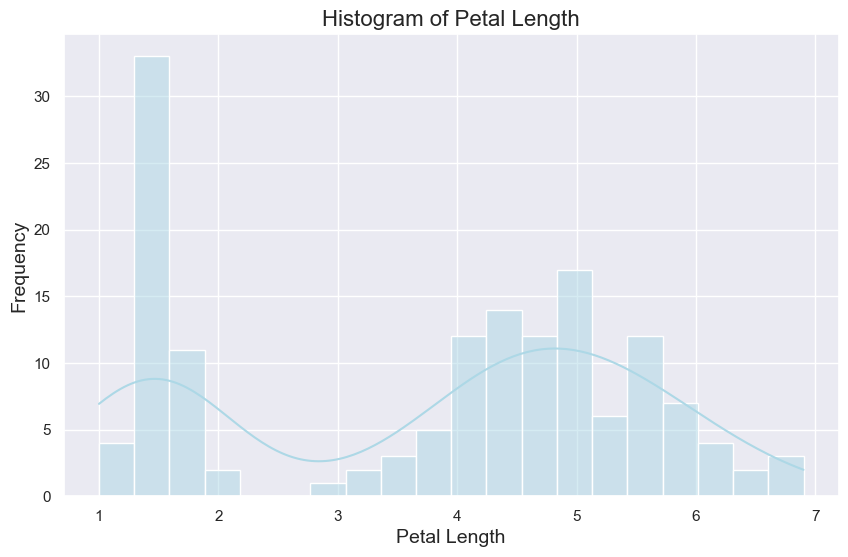

In [3]:
# Histogram of petal length
plt.figure(figsize=(10, 6))
sns.histplot(iris['petal_length'], kde=True, bins=20, color='lightblue')
plt.title('Histogram of Petal Length', fontsize=16)
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


A bimodal, left-skewed distribution. Individually, each mode is right-skewed, with the smaller (length) distribution very leptokurtic and the larger, platykurtic. I'd be interested to see what clusters form surrounding length and species.


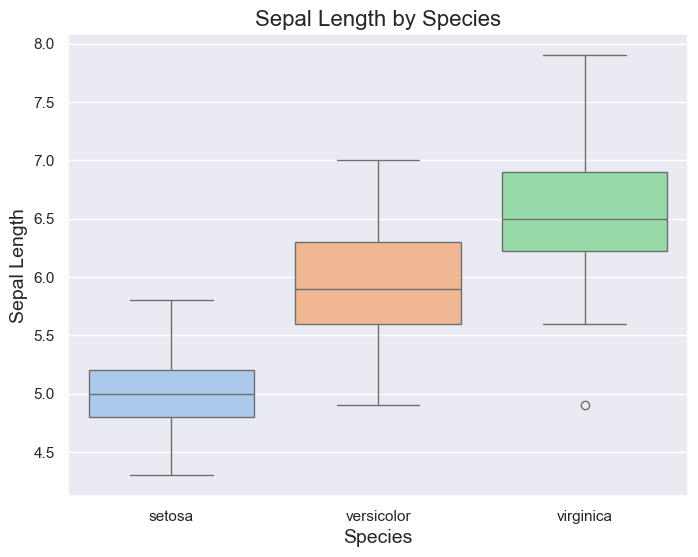

In [4]:
# Boxplot of sepal length grouped by species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal_length', data=iris, palette='pastel')
plt.title('Sepal Length by Species', fontsize=16)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Sepal Length', fontsize=14)
plt.show()


Different sepal length central tendencies are displayed by each species. "setosa" has the smallest IQR, with the other species nearly equal in size, although "virginica" is generally larger than "versicolor". "Virginica" has at least one noted possible outlier.


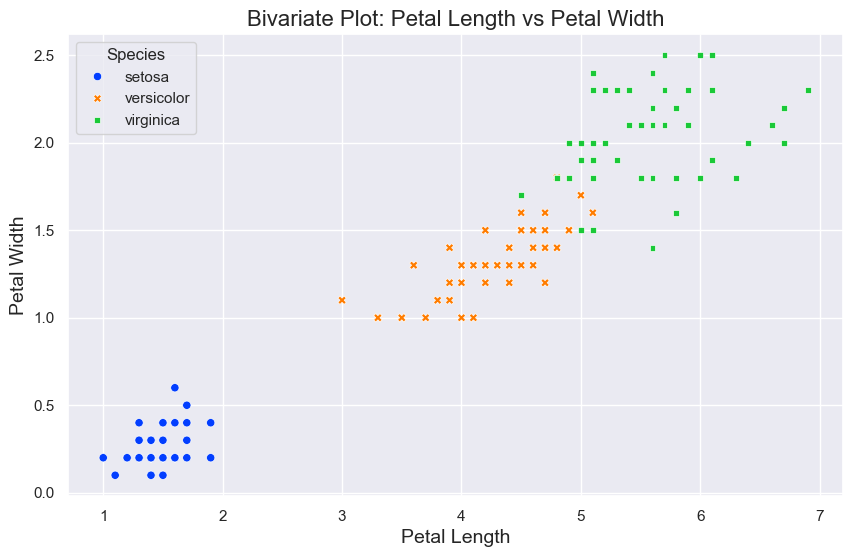

In [5]:
# Bivariate plot: Petal length vs petal width
plt.figure(figsize=(10, 6))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', style='species', data=iris, palette='bright')
plt.title('Bivariate Plot: Petal Length vs Petal Width', fontsize=16)
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.legend(title='Species')
plt.show()


Each species is grouped according to color, and intuitively, it seems petal length is positively associated with width. Comparing with the previous visualization, sepal length may not be positively correlated for each species. Petal widths vary less than lengths, and larger petals exhibit greater variance than smaller petals relative to the roughly y = 1/3.25x linear trend.


# Conclusion
The analysis reveals significant size (length & width) across the three species, with each species minimally overlapping in size with each other and notably unequal variance across each (higher as the size increases). The "Setosa" species is more more different than the other two species in size and variance, but is not underrepresented according to the histogram, where all small records belong to the "Setosa" species.

Further analysis could dive into the specific differences between the "Versicolor" and "Virginica" species to identify similarities between them other than size, and potentially identify causal factors in differences between the species such as environment, phylogenetic influence, etc.
